# MadMiner : Laboritory for Testing - Room 1

This is a research lab to test the validate of the mined material.  

## 0. Reseach Library: 

In [1]:
#Set right path to MadMiner
import sys
import os
delphes_src_path = "/Users/felixkling/Documents/GitHub/delphesminer"
sys.path.append(delphes_src_path)
madminer_src_path = "/Users/felixkling/Documents/GitHub/madminer"
sys.path.append(madminer_src_path)

#Import MadMiner
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
from matplotlib import pyplot as plt
% matplotlib inline

from madminer.goldmine import GoldMine
from madminer.refinery import combine_and_shuffle
from madminer.refinery import Refinery
from madminer.refinery import constant_benchmark_theta, multiple_benchmark_thetas
from madminer.refinery import constant_morphing_theta, multiple_morphing_thetas, random_morphing_thetas
from madminer.tools.plots import plot_2d_morphing_basis
from delphesprocessor.delphesprocessor import DelphesProcessor

#Set Path to MG5 directory
mg_dir = '/Users/felixkling/work/MG5_aMC_v2_6_2'

## 1. Select Samples

The last important MadMiner class is the `Smithy`. From all the data we have in the HDF5 file now, it extracts unweighted samples including the augmented data ("gold") that is needed as training and evaluation data for the Machine Learning algorithms.

The Refinery class defines four different high-level functions to generate train or test samples:

    extract_samples_train_plain(), which only saves observations x, for instance for histograms or ABC;
    extract_samples_train_local() for methods like SALLY and SALLINO;
    extract_samples_train_ratio() for techniques like CARL, ROLR, CASCAL, and RASCAL; and
    extract_samples_test() for the evaluation of any method.

For the arguments theta, theta0, or theta1, you can use the helper functions constant_benchmark_theta(), multiple_benchmark_thetas(), constant_morphing_theta(), multiple_morphing_thetas(), and random_morphing_thetas(), all defined in the smithy module.

In [9]:
smithyA = Refinery('datasave/madminer_example_shuffled_runA.h5', debug=True)

xA, thetaA = smithyA.extract_samples_test(
    theta=constant_benchmark_theta('sm'),
    n_samples=10000,
    folder='./datasave/samples',
    filename='test'
)

smithyB = Refinery('datasave/madminer_example_shuffled_runB.h5', debug=True)

xB, thetaB = smithyB.extract_samples_test(
    theta=constant_benchmark_theta('bsm0'),
    n_samples=10000,
    folder='./data/samples',
    filename='test'
)

10:53  
10:53  ------------------------------------------------------------
10:53  |                                                          |
10:53  |  MadMiner                                                |
10:53  |                                                          |
10:53  |  Version from July 19, 2018                              |
10:53  |                                                          |
10:53  |           Johann Brehmer, Kyle Cranmer, and Felix Kling  |
10:53  |                                                          |
10:53  ------------------------------------------------------------
10:53  
10:53  
    
                                                      @ @ @ @   @ @ @ @                                
                                                     @. . . . @ . . . . @                              
                                                     @. . . . . . . . . @                              
                   @@@@@@@@@@@@@@@             

10:53  Loading data from datasave/madminer_example_shuffled_runB.h5
10:53  Found 2 parameters:
10:53     CWL2 (LHA: dim6 2, maximal power in squared ME: 2, range: (-10.0, 10.0))
10:53     CPWL2 (LHA: dim6 5, maximal power in squared ME: 2, range: (-10.0, 10.0))
10:53  Found 6 benchmarks:
10:53     bsm0: CWL2 = -4.00e+00, CPWL2 = 0.00e+00
10:53     bsm1: CWL2 = 4.00, CPWL2 = 0.00e+00
10:53     bsm2: CWL2 = 2.77, CPWL2 = 8.62
10:53     bsm3: CWL2 = 1.47, CPWL2 = -8.21e+00
10:53     bsm4: CWL2 = -5.71e+00, CPWL2 = -7.29e+00
10:53     bsm5: CWL2 = 7.55, CPWL2 = -9.31e+00
10:53  Found 4 observables: pt_e1, pt_mu1, delta_eta_ll, delta_phi_ll
10:53  Found 133320 events
10:53  Found morphing setup with 6 components
10:53  Extracting evaluation sample. Sampling according to (u'benchmark', u'bsm0')
10:53  Starting sample extraction
10:53  New theta configuration
10:53    Sampling theta: benchmark, bsm0
10:53    Auxiliary theta: None, None
10:53    # samples: 10000


## 2. A first look: Corner Plot

Let's have a quick look at a corner plot. They look cool 

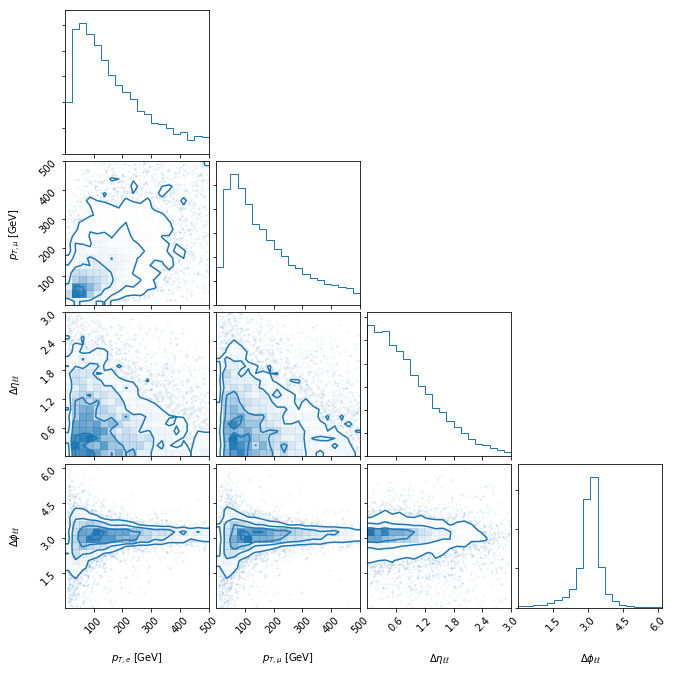

In [57]:
import corner

labels = [r'$p_{T,e}$ [GeV]', r'$p_{T,\mu}$ [GeV]', r'$\Delta \eta_{\ell\ell}$', r'$\Delta \phi_{\ell\ell}$']
ranges = [(0., 500.), (0., 500.), (0.,3.), (0.,6.2)]

_ = corner.corner(xB, color='C0', labels=labels, range=ranges)

### 3. Quality Test A : Comapre Refinery distribution to Delphes Distribution

As a first test, let's check of the distributions produced by the Refinery agrees with the distributions from Pythia.

In [ ]:
# Produce unweighted event samples and corresponding weights 
totalxs=sum(dm.weights[0])
data=np.zeros( (len(dm.observations),len(x)) )
dataweights=np.zeros( (len(dm.observations),len(x)) )
for i in range(0,len(dm.observations)):
    for j in range(0,len(x)):
        data[i][j] = x[j][i]
        dataweights[i][j] = totalxs/len(x)
        


# Do some plotting
xlabels = [r'$p_{T,e}$ [GeV]', r'$p_{T,\mu}$ [GeV]', r'$\Delta \eta_{\ell\ell}$', r'$\Delta \phi_{\ell\ell}$']
ylabels = [r'$d\sigma/dp_{T,e}$ [pb/bin]', r'$d\sigma/p_{T,\mu}$ [pb/bin]', r'$d\sigma/\Delta \eta_{\ell\ell} [pb/bin]$', r'$d\sigma/\Delta \phi_{\ell\ell} [pb/bin]$']
ranges = [(0., 500.), (0., 500.), (0.,3.), (0.,6.2)]

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
f.set_size_inches(11,8)

ax1.set_xlabel(xlabels[0])
ax1.set_ylabel(ylabels[0])
ax1.hist(dm.observations['pt_e1'], range=ranges[0], bins=20, histtype='step', 
         weights=dm.weights[0])
ax1.hist(data[0], range=ranges[0], bins=20, histtype='step', 
         weights=dataweights[0], linestyle=('dotted'))

ax2.set_xlabel(xlabels[0])
ax2.set_ylabel(ylabels[1])
ax2.hist(dm.observations['pt_mu1'], range=ranges[1], bins=20, histtype='step', 
         weights=dm.weights[0],label="Delphes")
ax2.hist(data[1], range=ranges[1], bins=20, histtype='step', 
         weights=dataweights[1], linestyle=('dotted'),label="Smithy")
ax2.legend(bbox_to_anchor=(0.6, 0.95), loc=2, borderaxespad=0.)

ax3.set_xlabel(xlabels[2])
ax3.set_ylabel(ylabels[2])
ax3.hist(dm.observations['delta_eta_ll'], range=ranges[2], bins=20, histtype='step', 
         weights=dm.weights[0])
ax3.hist(data[2], range=ranges[2], bins=20, histtype='step', 
         weights=dataweights[2], linestyle=('dotted'))

ax4.set_xlabel(xlabels[3])
ax4.set_ylabel(ylabels[3])
ax4.hist(dm.observations['delta_phi_ll'], range=ranges[3], bins=20, histtype='step', 
         weights=dm.weights[0])
ax4.hist(data[3], range=ranges[3], bins=20, histtype='step', 
         weights=dataweights[3], linestyle=('dotted'))

plt.show()